### Calibrate to NHIS data

by looking at smoking rates from 2016-2020

In [16]:
from glob import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
files = sorted(glob("../../outputs/numpy_arrays/np_output_calibrated_to_NHIS_*"))
len(files)
# print(files)

1414

In [18]:
# target_arr = pd.read_excel("/home/nick/Gillings_work/nhis_data/NHIS_smoker_proportions./NHIS_State_age/NHIS_State_age/NHIS_Smoker_age/percent_smoker_by_year.xlsx").to_numpy()
target_arr = pd.read_excel("/home/nick/Gillings_work/nhis_data/NHIS_smoker_proportions./NHIS_State_age/NHIS_State_age/percent_34_by_year.xlsx").to_numpy()
target_arr = target_arr[:,1] / 100
target_arr

array([0.13776604, 0.12563898, 0.1239768 , 0.12335997, 0.11472149])

In [19]:
x = []
y = []

for n in range(101):
    n_str = str(n)
    while len(n_str) < 3:
        n_str = "0" + n_str
    files = sorted(glob(f"../../outputs/numpy_arrays/np_output_calibrated_to_NHIS_{n_str}*"))
    x.append(n)
    to_avg = []

    for f in files:
        arr = np.load(f)
        arr = np.sum(arr, axis=(1,2))
        smoking_percents = np.sum(arr[:,2:-2], axis=1) / np.sum(arr[:,:], axis=1)
        smoking_percents = smoking_percents[:5]
        # print(num, smoking_percents)

        metric = np.linalg.norm(smoking_percents - target_arr)
        to_avg.append(metric)

    y.append(np.mean(metric))

In [21]:
m = np.argmin(y)
print(x[m])
print(y[m])

94
0.039331736563325


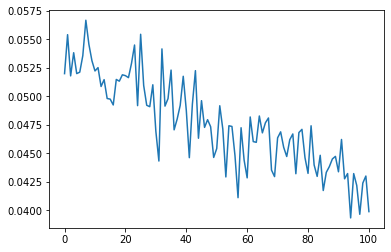

In [22]:
data = zip(x,y)
data = sorted(data, key=lambda x: x[0])
x = [d[0] for d in data]
y = [d[1] for d in data]
plt.plot(x,y)
plt.show()